In [24]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("support-files/qubit.mplstyle")

twoPi = 2*np.pi

<IPython.core.display.Javascript object>


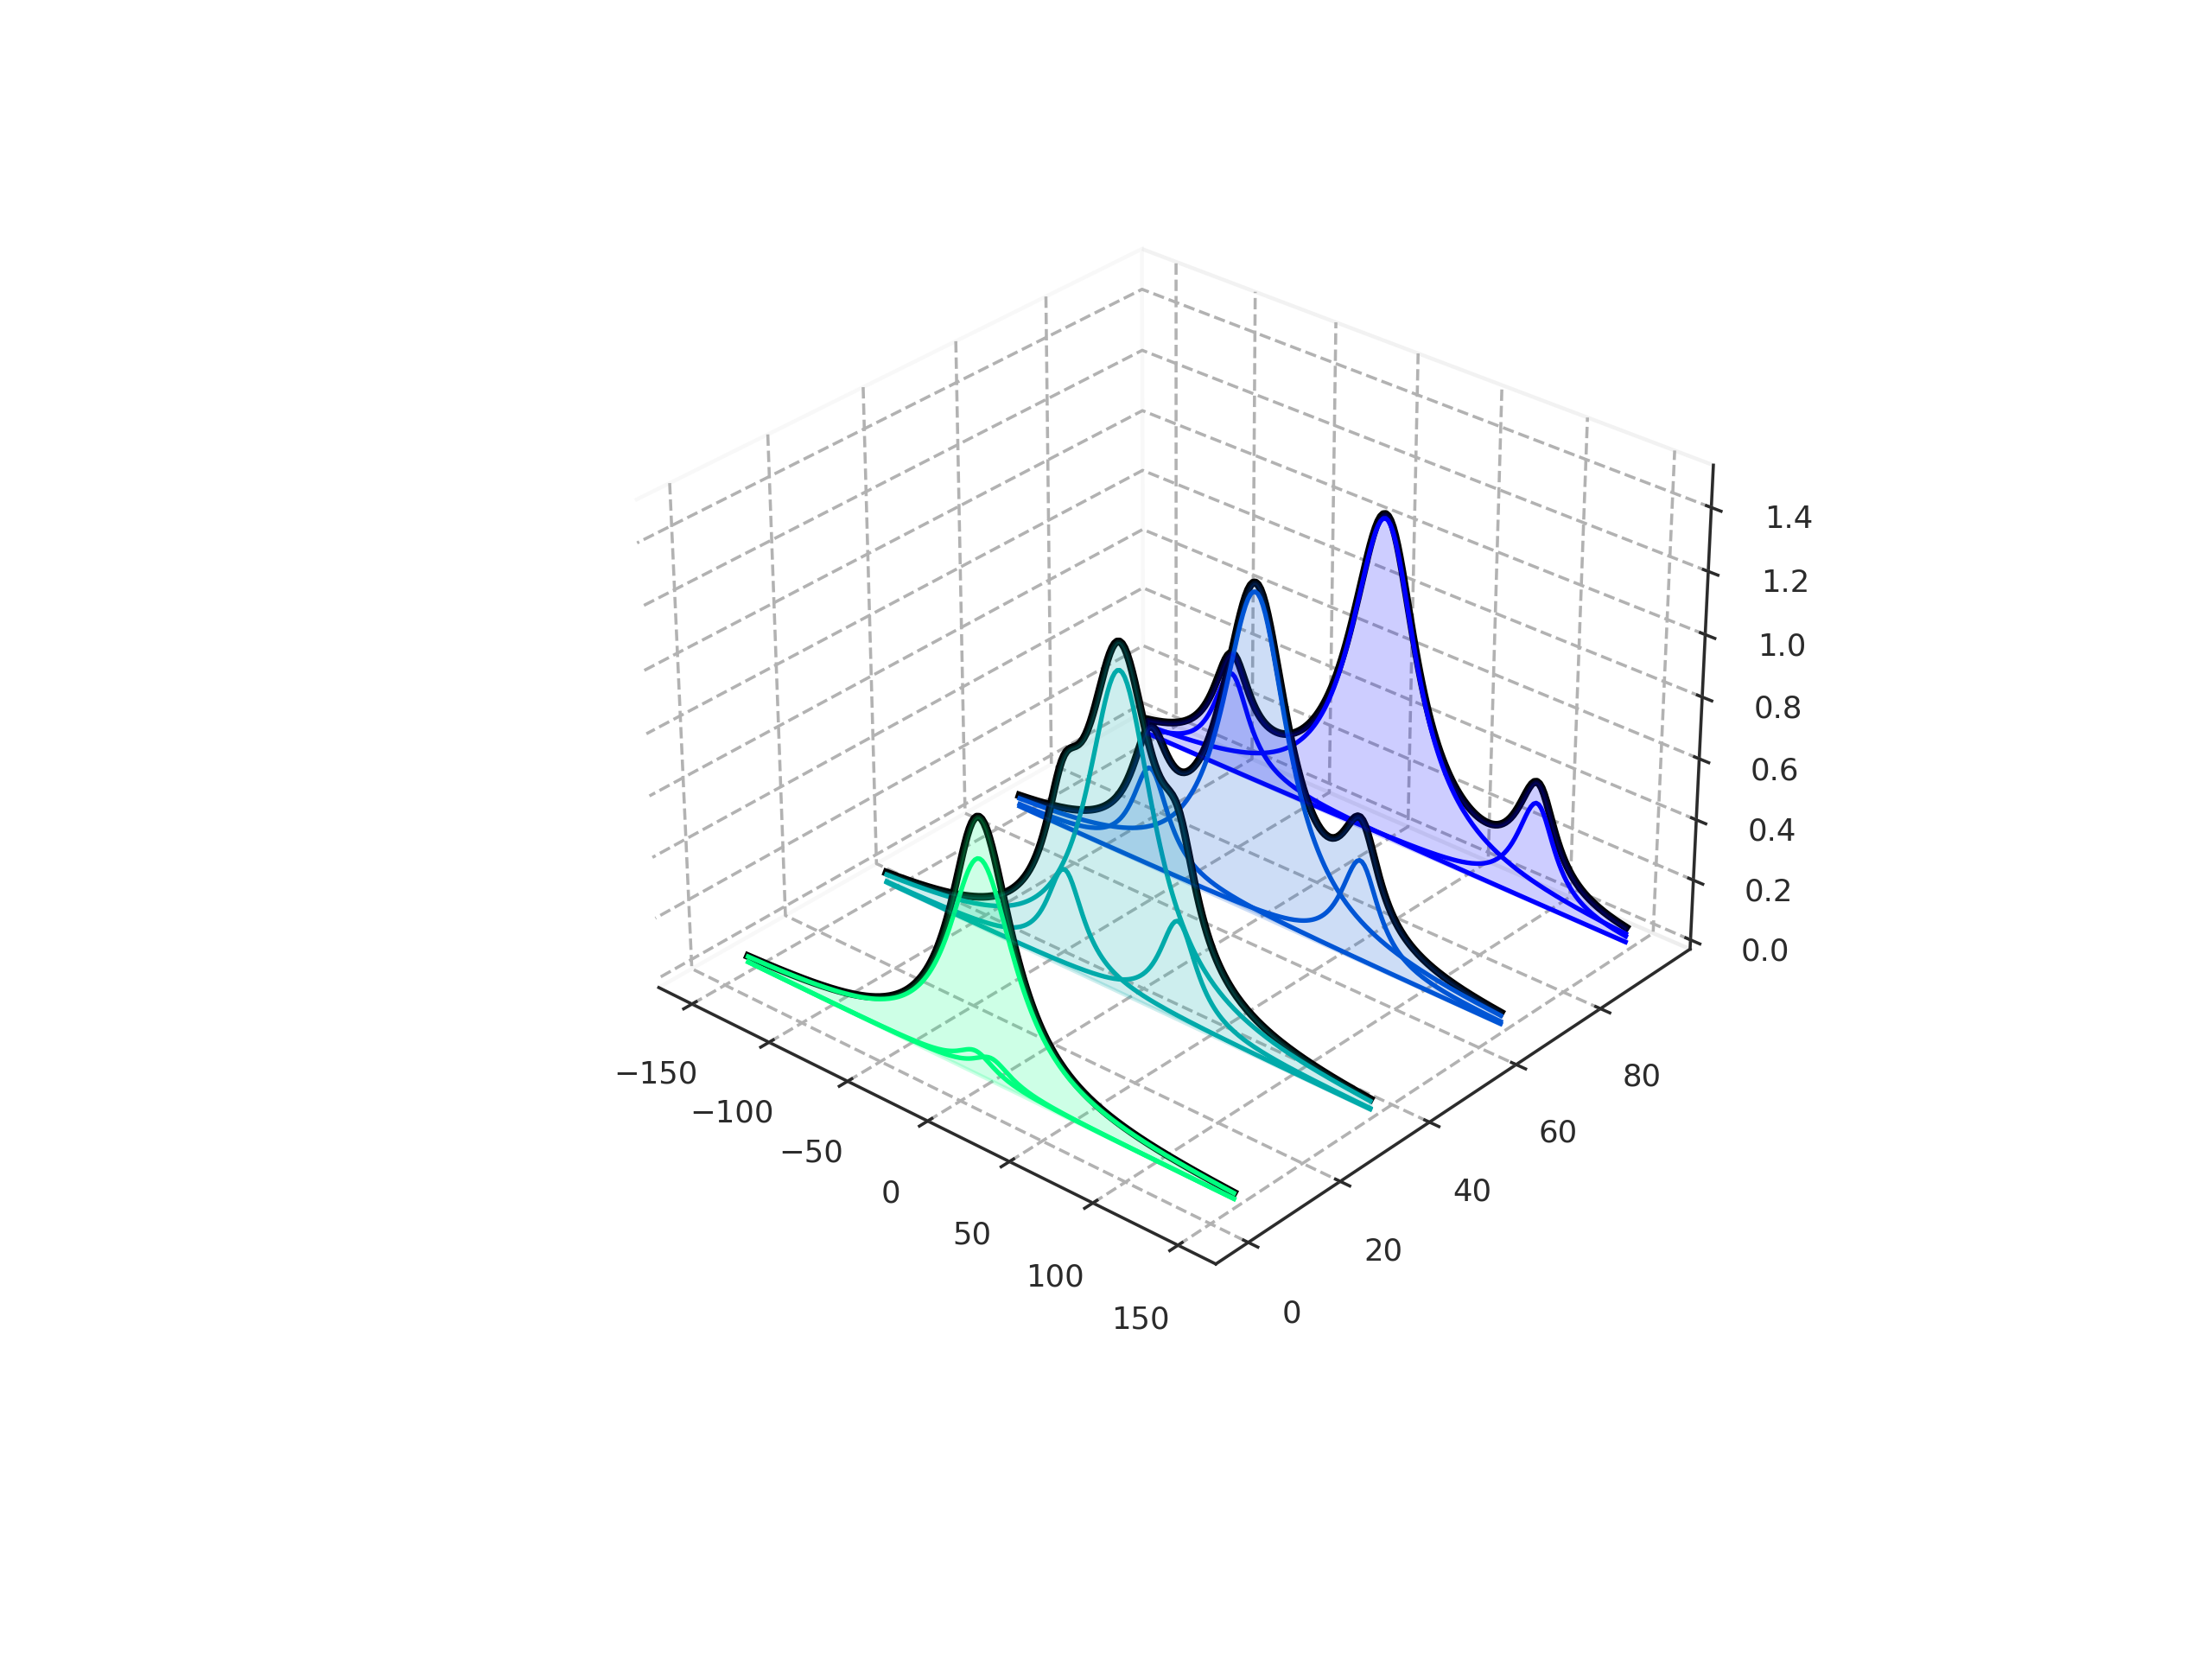

Negative!
Negative!
Negative!
Negative!
Negative!
Negative!
Negative!
Negative!


In [148]:
def central_kernel(Gamma, Omega):
    Y = np.sqrt(2) * Omega / Gamma
    
    AMPLITUDE = 1 / twoPi * (1/4) * Y**2 / (1 + Y**2) * Gamma
    GAMMASQUARED = Gamma**2
    
    def kernel(dw):
        return AMPLITUDE / (GAMMASQUARED**2 + dw**2)
    return kernel

def side_kernel(Gamma, Omega, one_or_minus_one):
    Y = np.sqrt(2) * Omega / Gamma
    deltaSquare = (Gamma/4)**2 - Omega**2
    
    if (deltaSquare == 0):
        raise RuntimeError("Bad luck!")
    if (deltaSquare > 0):
        print("Positive!")
        delta = np.sqrt(deltaSquare)
        AMPLITUDE = (
            1 / twoPi
            * -1/8 *  Y**2 / (1 + Y**2)**2
            * (1 - Y**2 + one_or_minus_one * (1-5*Y**2) * Gamma/4/delta)
        )
        SHIFT_DW = 0
        GAMMASQUARED = (3*Gamma/4 + one_or_minus_one*delta)**2
    else:
        print("Negative!")
        delta = np.sqrt(-deltaSquare)
        AMPLITUDE = (
            1 / twoPi
            * -1/8 *  Y**2 / (1 + Y**2)**2
            * (1 - Y**2)
        )
        SHIFT_DW = delta*one_or_minus_one
        GAMMASQUARED = (3*Gamma/4)**2
    def kernel(dw):
        return AMPLITUDE / (GAMMASQUARED**2 + (dw-SHIFT_DW)**2)
    return kernel

MHz = 10**6
GHz = 10**9
hbar = 6.64*10**(-34)

omega = 10*10**9
Gamma = 5
Omega_list = np.array([95, 65, 35, 5])
scaler = hbar * omega * Gamma*MHz / 10**(-20)

dw = np.linspace(-150,150, 201)
to_scale = np.ones(dw.size)

fig = plt.figure(figsize=(8,6))
ax = plt.subplot(projection='3d')
cmap = plt.cm.winter(np.linspace(0, 1, len(Omega_list)))


for i, Omega in enumerate(Omega_list):
    ck = central_kernel(Gamma, Omega)(dw) * scaler
    skl = side_kernel(Gamma, Omega,1)(dw) * scaler
    skr = side_kernel(Gamma, Omega,-1)(dw) * scaler
    total = (skr + skl + ck)
    
    scaled_by_Omega = to_scale*Omega
    
    ax.add_collection3d(plt.fill_between(dw, total, 0, color=cmap[i], alpha=0.1), Omega, zdir='y')
    ax.plot(dw, scaled_by_Omega, total, color='black', linewidth=2)
    ax.plot(dw, scaled_by_Omega, ck, color=cmap[i])
    ax.plot(dw, scaled_by_Omega, skl, color=cmap[i])
    ax.plot(dw, scaled_by_Omega, skr, color=cmap[i])


# ax.zaxis.set_scale('log')

ax.set_zlim([0, 1.5])
# ax.set_xlabel('Detuning')
# ax.set_zlabel('S($\omega$)')
ax.view_init(azim=-49)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
plt.savefig("./output/incoherent-scattering.svg")

<IPython.core.display.Javascript object>


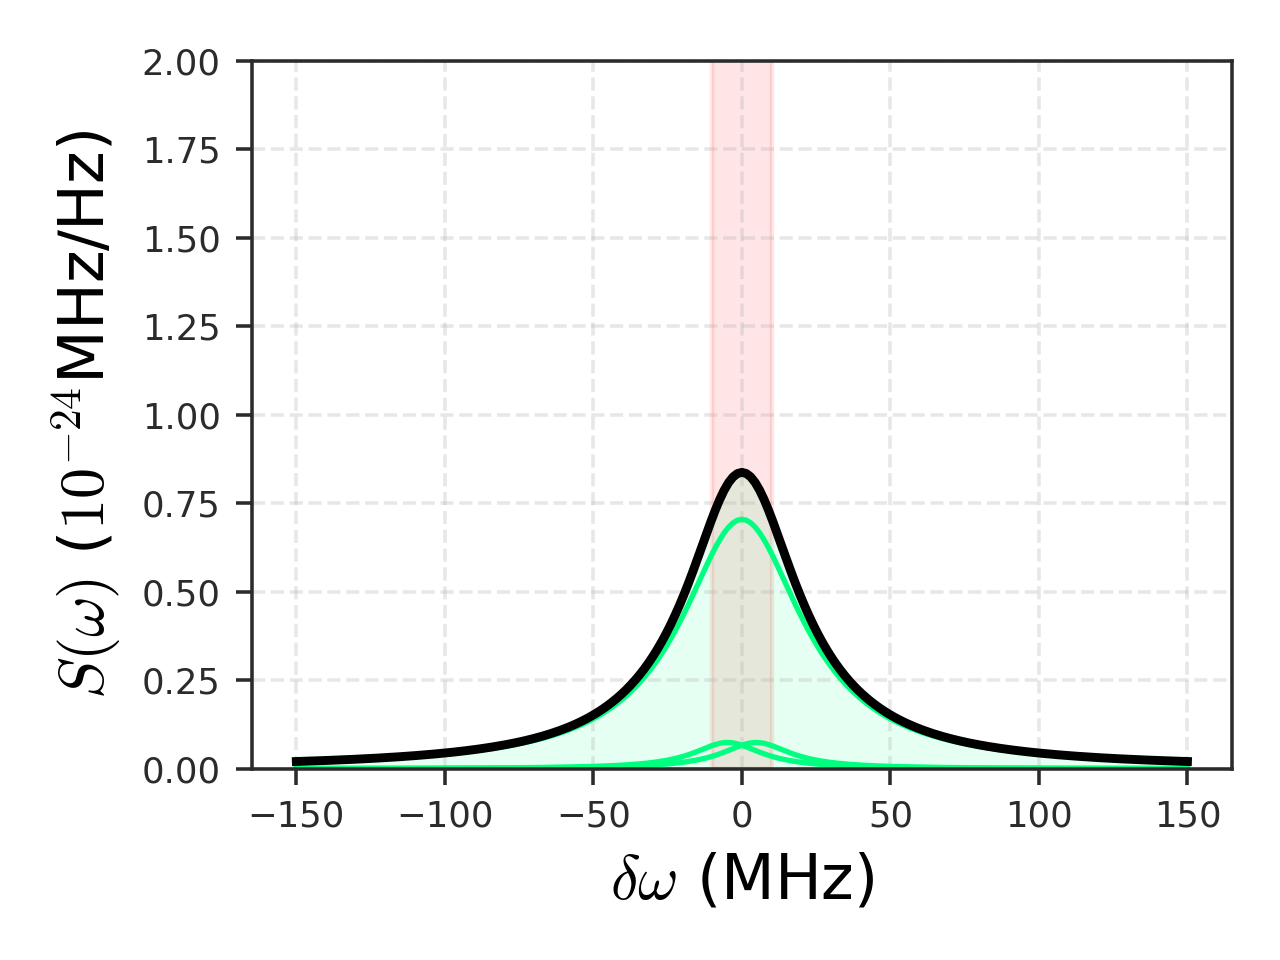

Negative!
Negative!


In [146]:
omega = 10*10**9
Gamma = 5
Omega = 5
scaler = hbar * omega * Gamma*MHz / 10**(-20)

Y = np.sqrt(2) * Omega / Gamma    
coherent = 1/2 * Y**2 / (1+Y**2)**2 * scaler
RBW = 20
RBW_axis = np.linspace(-RBW/2, RBW/2)
coherent_amplitude = coherent/RBW * np.ones(RBW_axis.size)

fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.fill_between(RBW_axis, 0, coherent_amplitude, alpha=0.1, color='red')

ck = central_kernel(Gamma, Omega)(dw) * scaler
skl = side_kernel(Gamma, Omega,1)(dw) * scaler
skr = side_kernel(Gamma, Omega,-1)(dw) * scaler
total = (skr + skl + ck)
    
ax.fill_between(dw, 0, total, color=cmap[-1], alpha=0.1)
ax.plot(dw, ck, color=cmap[-1])
ax.plot(dw, skl, color=cmap[-1])
ax.plot(dw, skr, color=cmap[-1])
ax.plot(dw, total, color='black', linewidth=2)

ax.set_ylim([0,2])
ax.set_ylabel("$S(\omega)$ ($10^{-24}$MHz/Hz)")
ax.set_xlabel("$\delta\omega$ (MHz)")
plt.tight_layout()
plt.savefig("./output/coherent-incoherent.svg")

<IPython.core.display.Javascript object>


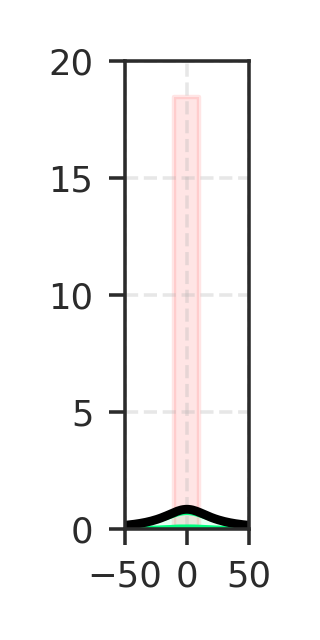

Negative!
Negative!


In [147]:
fig, ax = plt.subplots(1, 1, figsize=(1,2))
ax.fill_between(RBW_axis, 0, coherent_amplitude, alpha=0.1, color='red')

ck = central_kernel(Gamma, Omega)(dw) * scaler
skl = side_kernel(Gamma, Omega,1)(dw) * scaler
skr = side_kernel(Gamma, Omega,-1)(dw) * scaler
total = (skr + skl + ck)
    
ax.fill_between(dw, 0, total, color=cmap[-1], alpha=0.1)
ax.plot(dw, ck, color=cmap[-1])
ax.plot(dw, skl, color=cmap[-1])
ax.plot(dw, skr, color=cmap[-1])
ax.plot(dw, total, color='black', linewidth=2)

ax.set_ylim([0,20])
ax.set_xlim([-50,50])
plt.tight_layout()
plt.savefig("./output/coherent-incoherent-zoomed-out.svg")

# Distortion

<IPython.core.display.Javascript object>


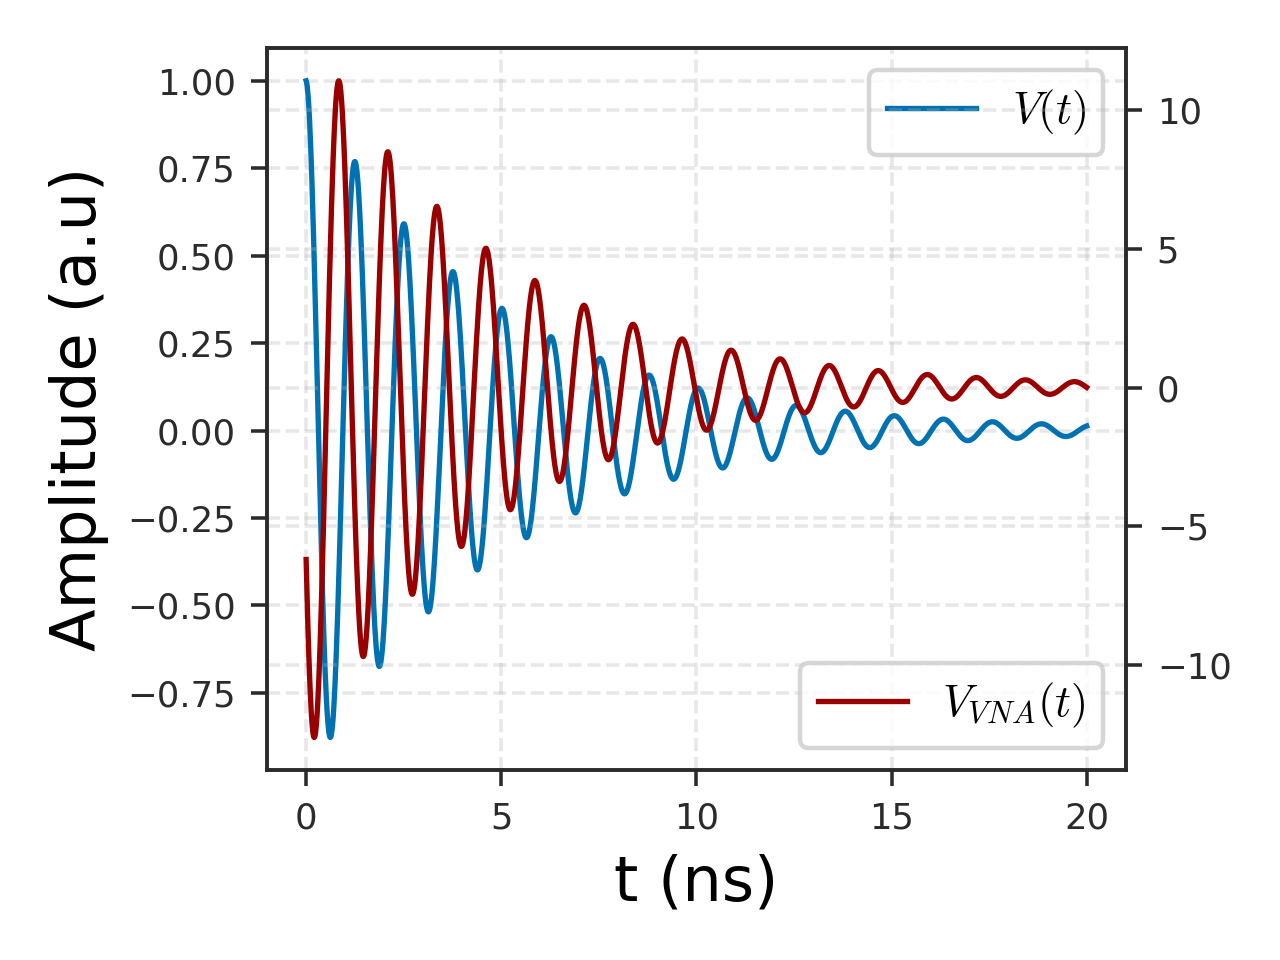

In [23]:
DATA = np.loadtxt("./data/decayPoints.txt")
DATA2 = np.loadtxt("./data/vnaDecayPoints.txt")


fig, ax = plt.subplots(1, 1, figsize=(4,3))
ax.plot(DATA[:,0], DATA[:,1], color="C1", label="$V(t)$")
ax1 = ax.twinx()
ax1.plot(DATA2[:,0], DATA2[:,1], color="C4", label="$V_{VNA}(t)$")

# ax.set_ylim([0,2])
ax.set_ylabel("Amplitude (a.u)")
ax.set_xlabel("t (ns)")
ax.legend(loc='upper right')
ax1.legend(loc='lower right')
plt.tight_layout()
plt.savefig("./output/timing-window-decay.svg")

# Coplanar capacitance

In [44]:
um = 10**(-6)
e0 = 8.85*10**(-12)
er = 11.6
mm = 10**(-3)

w = 1
s = 4*um #gap
l = 20*um #total size
t = 1*mm

C1 = w * e0 * 2/np.pi * np.log(4*l/s)
C2 = w * e0 * (er - 1) / np.pi * np.log(16*(t)/np.pi/s)
C2

2.1348333794328108e-10

# De broglie

In [43]:
e = 1.6*10**(-19)
me = 9*10**(-31)
h = 6.64*10**(-34)

energy = 100*100*e
momentum = np.sqrt(2*me*energy)

h / momentum / 10**(-10)

0.12372909475498832